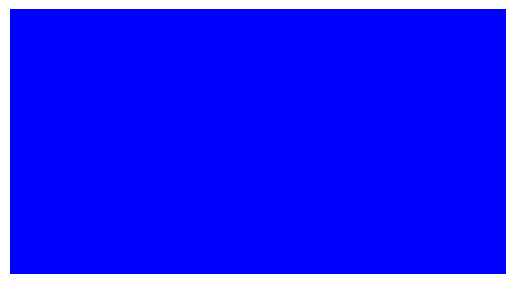

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Cargar una imagen en escala de grises
image = cv2.imread('pentagono.png', 0)

# Definir los parámetros de la Transformada de Hough
rho_res = 1  # Resolución de rho
theta_res = np.pi / 180  # Resolución de theta (en radianes)

# Definir los rangos de rho y theta
rho_max = int(np.sqrt(image.shape[0]**2 + image.shape[1]**2))  # Longitud máxima de rho
theta_range = np.linspace(-np.pi/2, np.pi/2, 180)  # Rango de ángulos de theta

# Crear la matriz de acumulación
accumulator = np.zeros((rho_max * 2, len(theta_range)), dtype=np.uint64)

# Encontrar los píxeles de borde en la imagen
edge_pixels = np.argwhere(image > 0)

# Calcular la Transformada de Hough
for pixel in edge_pixels:
    y, x = pixel
    for theta_index, theta in enumerate(theta_range):
        rho = int(x * np.cos(theta) + y * np.sin(theta))
        accumulator[rho, theta_index] += 1

# Encontrar las líneas más prominentes
threshold = 100  # Umbral de votación
lines = np.argwhere(accumulator > threshold)

# Dibujar las líneas encontradas en la imagen original
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for rho, theta_index in lines:
    theta = theta_range[theta_index]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = int(a * rho)
    y0 = int(b * rho)
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Mostrar la imagen resultante
plt.imshow(output_image)
plt.axis('off')
plt.show()
